# Chap 1: Bài toán dự báo

## Hồi quy tuyến tính

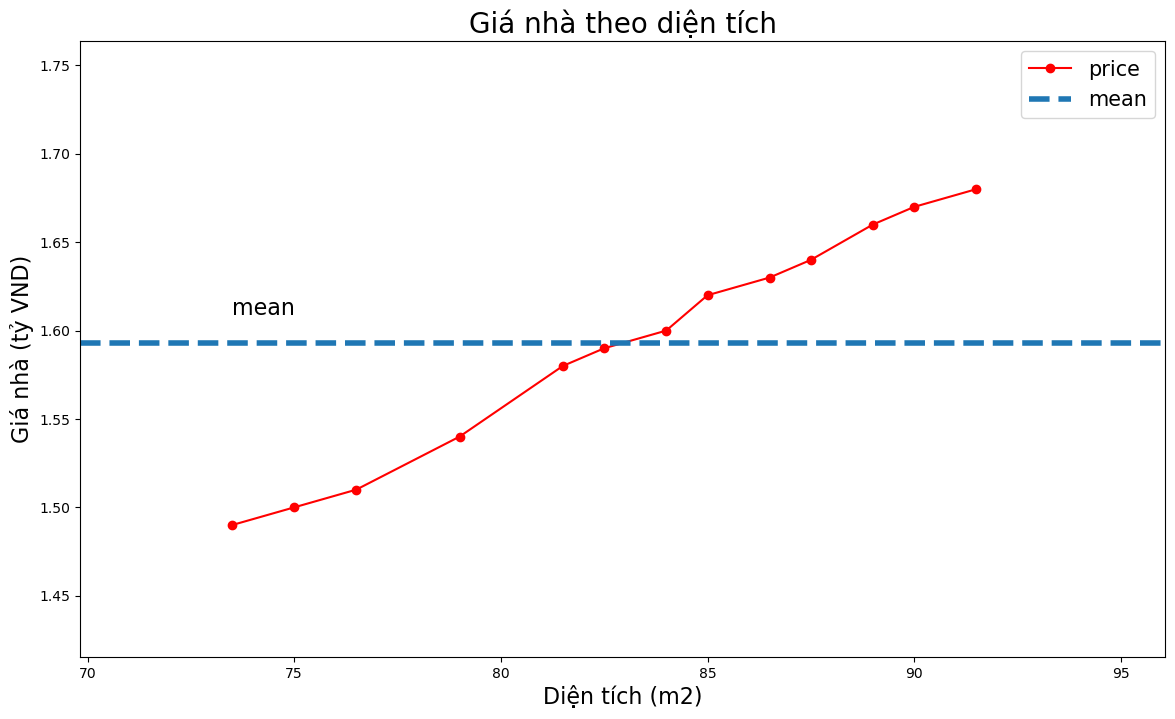

In [181]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# area
x = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

# Visualize data
def _plot(x, y, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(14, 8))
  plt.plot(x, y, 'r-o', label="price")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y)
  y_max = np.max(y)
  # mean price
  ybar = np.mean(y)
  plt.axhline(ybar, linestyle='--', linewidth=4, label="mean")
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.text(x_min, ybar*1.01, "mean", fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()

_plot(x, y, 
      title='Giá nhà theo diện tích',  
      xlabel='Diện tích (m2)', 
      ylabel='Giá nhà (tỷ VND)')

In [183]:
# tính trung bình
xbar = np.mean(x)
ybar = np.mean(y)
x2bar = np.mean(x**2)
xybar = np.mean(x*y)

# tính w0, w1
w1 = (xbar*ybar-xybar)/(xbar**2-(x2bar))
w0 = ybar-w1*xbar

print('w1: ', w1)
print('w0: ', w0)

w1:  0.011184099238793658
w0:  0.6626458979418968


In [185]:
from sklearn import linear_model

# area
x1 = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis = 1)

# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

In [186]:
X

array([[73.5, 20. ],
       [75. , 18. ],
       [76.5, 17. ],
       [79. , 16. ],
       [81.5, 15. ],
       [82.5, 14. ],
       [84. , 12. ],
       [85. , 10. ],
       [86.5,  8. ],
       [87.5,  7. ],
       [89. ,  5. ],
       [90. ,  2. ],
       [91.5,  1. ]])

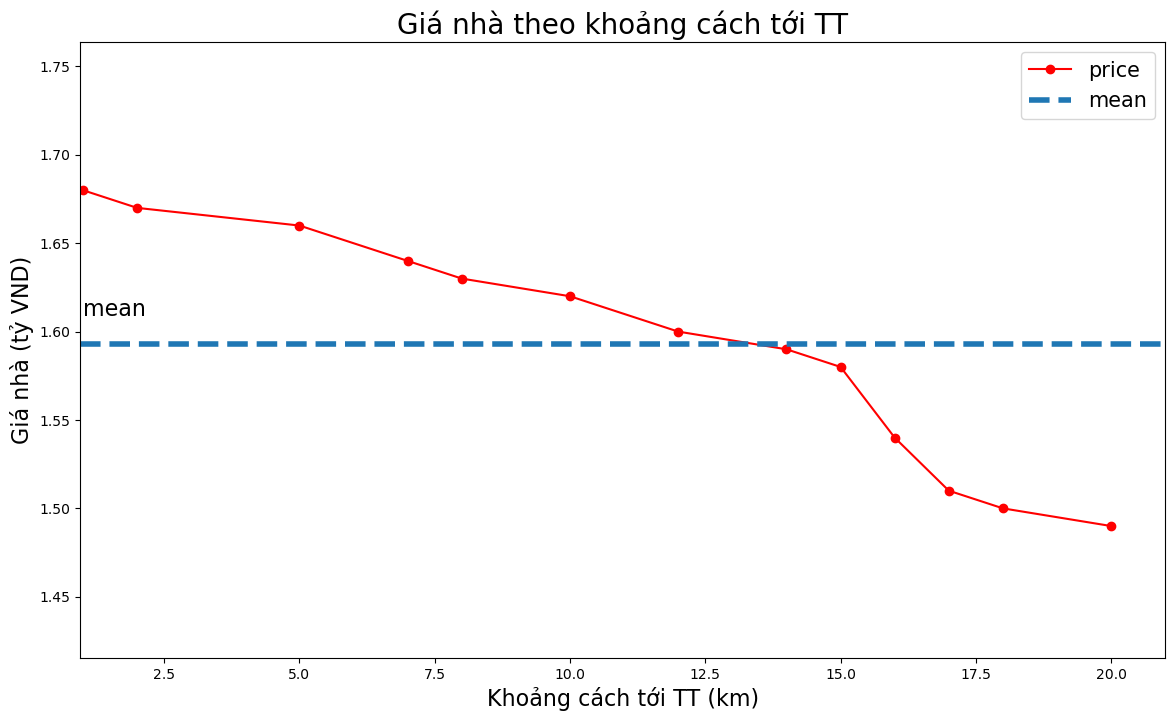

In [189]:
import matplotlib.pyplot as plt

_plot(x2, y, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT (km)', 
      ylabel='Giá nhà (tỷ VND)')

In [190]:
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias

regr.fit(X, y)

# Compare two results
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[0.01252422 0.00130004]]
Interception  :  [0.53665806]


In [191]:
# Dự báo giá nhà ngay trên tập huấn luyện
ypred = regr.predict(X)

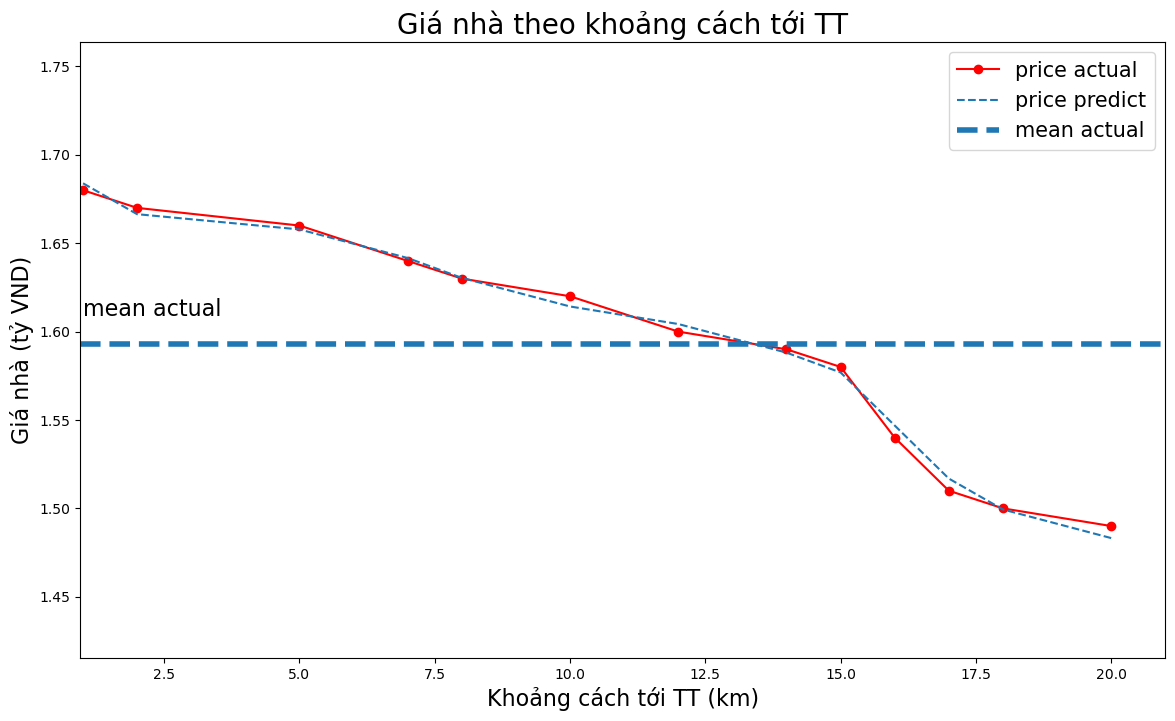

In [192]:
# Visualize data
def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(14, 8))
  plt.plot(x, y_act, 'r-o', label="price actual")
  plt.plot(x, y_pred, '--', label="price predict")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y_act)
  y_max = np.max(y_act)
  # mean price
  ybar = np.mean(y_act)
  plt.axhline(ybar, linestyle='--', linewidth=4, label="mean actual")
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.text(x_min, ybar*1.01, "mean actual", fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()


_plot_act_pred(x2, y, ypred, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT (km)', 
      ylabel='Giá nhà (tỷ VND)')

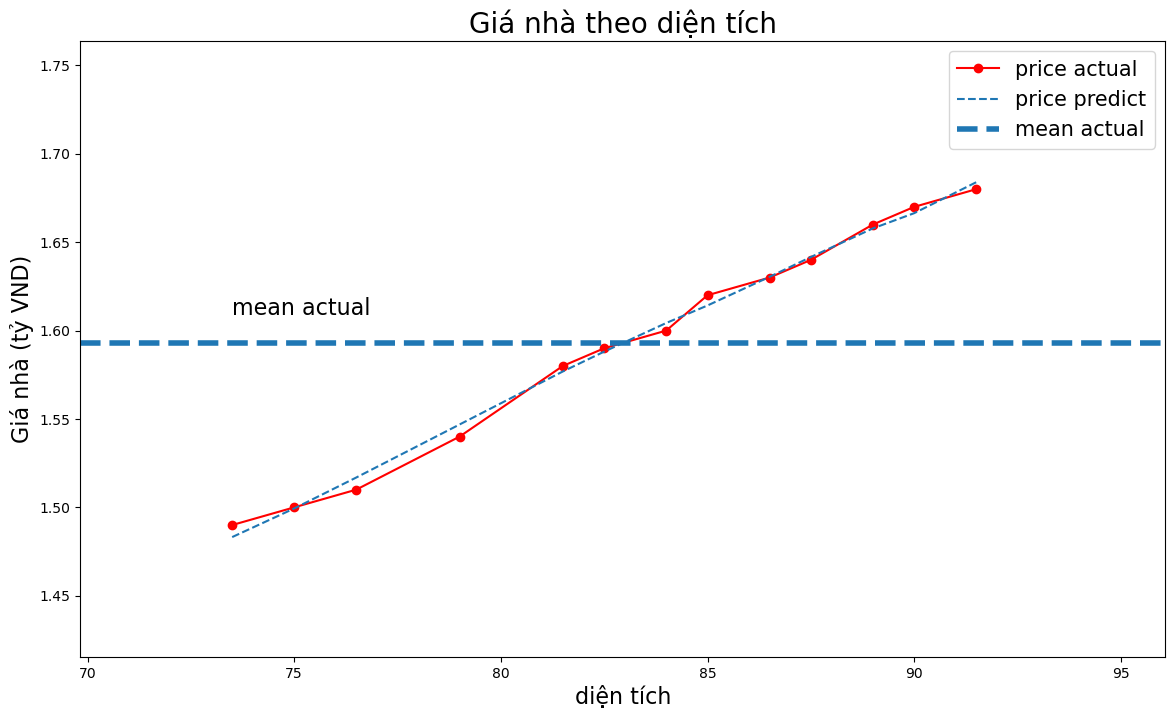

In [195]:
_plot_act_pred(x1, y, ypred, 
      title='Giá nhà theo diện tích',  
      xlabel='diện tích', 
      ylabel='Giá nhà (tỷ VND)')

<Axes: >

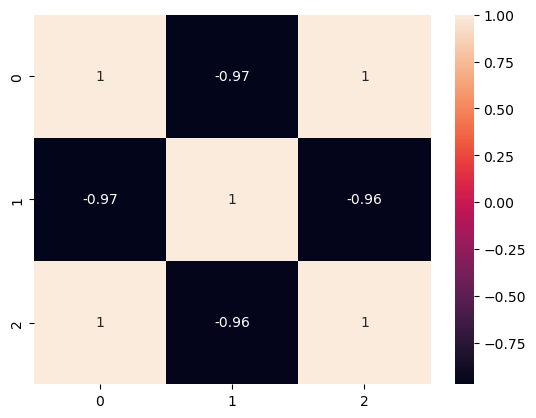

In [197]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(np.concatenate([X, y], axis=1)).corr()
sns.heatmap(df, annot=True)

In [198]:
# Khởi tạo diện tích
x1 = np.arange(90, 111, 1)
x1 = np.expand_dims(x1, axis=1)
# Khởi tạo khoảng cách tới trung tâm
x2 = np.arange(10, 31, 1)
x2 = np.expand_dims(x2, axis=1)
# Ma trận đầu vào
X = np.concatenate([x1, x2], axis = 1)

# Dự báo 
ypred = regr.predict(X)

In [200]:
# Tạo lưới ma trận
x1grid, x2grid = np.meshgrid(x1, x2)

In [201]:
ys = []
for i in range(len(x1)):
  x1i=x1grid[:, i:(i+1)]
  x2i=x2grid[:, i:(i+1)]
  X = np.concatenate([x1i, x2i], axis=1)
  yi = regr.predict(X)
  ys.append(yi)

ypred = np.concatenate(ys, axis=1)

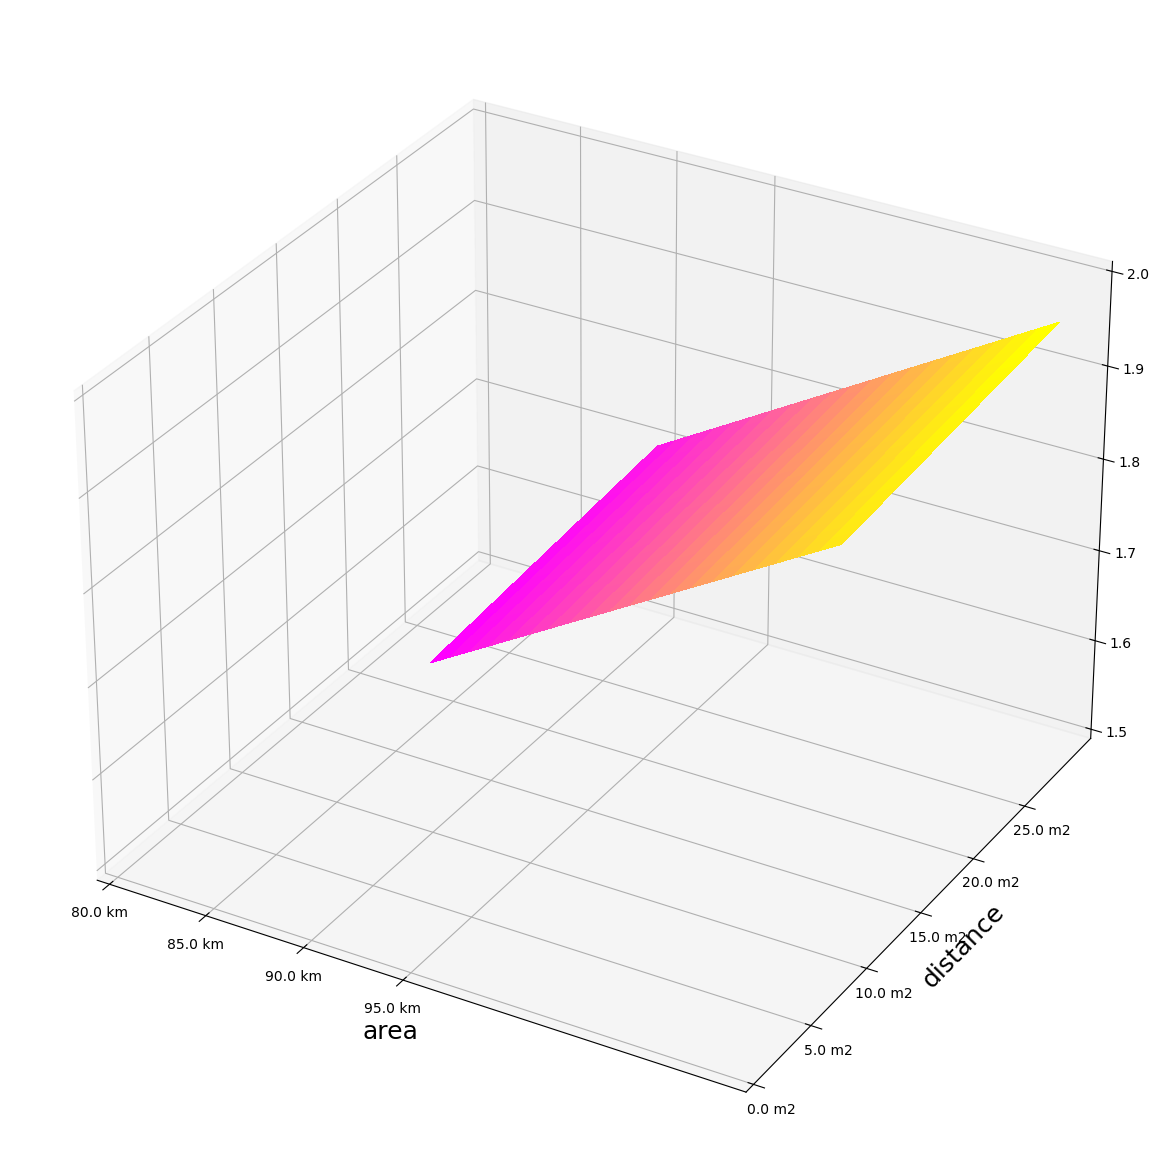

In [203]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection = '3d')

# Plot the surface.
surf = ax.plot_surface(x1grid, x2grid, ypred,cmap=cm.spring,
                       linewidth=0, antialiased=False)


x_pos = np.arange(80.0,100.0, 5)
x_names = [str(x_tick)+ " km" for x_tick in x_pos]
plt.xticks(x_pos, x_names)

y_pos = np.arange(0.0,30.0, 5)
y_names = [str(y_tick)+ " m2" for y_tick in y_pos]
plt.yticks(y_pos, y_names)

ax.set_zlim(1.5, 2.0)
plt.xlabel('area', fontsize=18)
plt.ylabel('distance', fontsize=18)

plt.show()

## Hồi quy Ridge

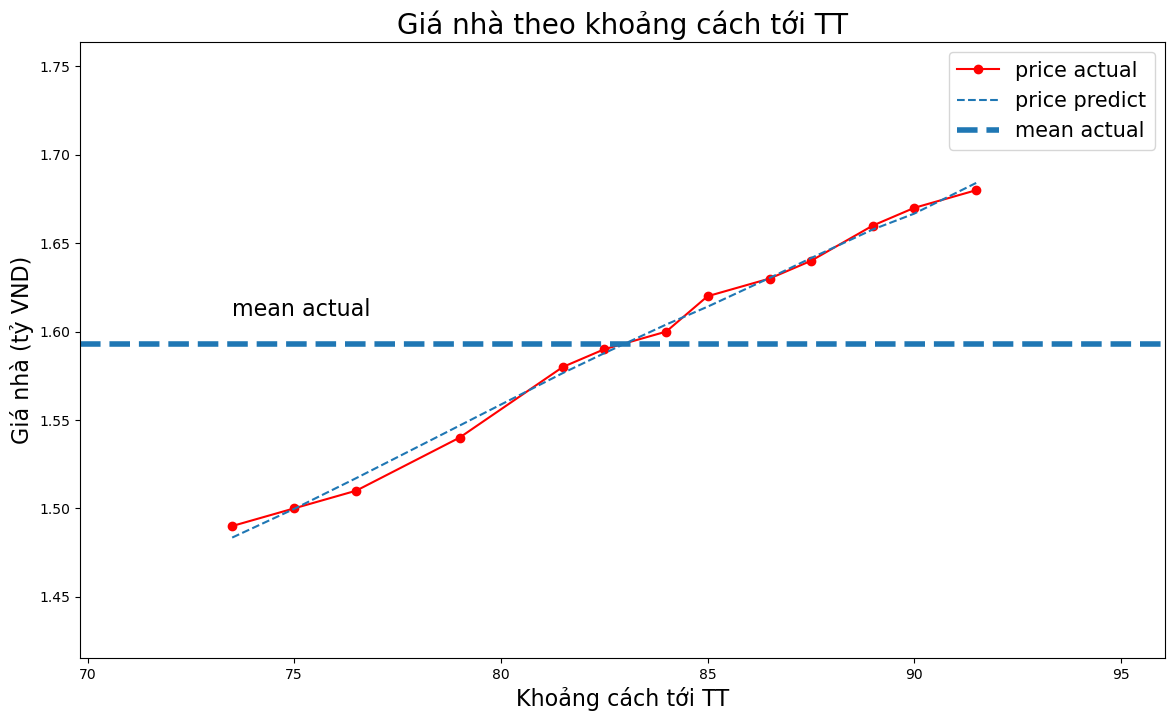

array([[0.01234242, 0.00113246]])

In [226]:
from sklearn.linear_model import Ridge


# area
x1 = np.array([[73.5,75.,76.5,79.,81.5,82.5,84.,85.,86.5,87.5,89.,90.,91.5]]).T
# distance to center
x2 = np.array([[20, 18, 17, 16, 15, 14, 12, 10, 8, 7, 5, 2, 1]]).T
# input matrix X
X = np.concatenate([x1, x2], axis = 1)
# price
y = np.array([[1.49,1.50,1.51,1.54,1.58,1.59,1.60,1.62,1.63,1.64,1.66,1.67,1.68]]).T

rid_regr = Ridge(alpha = 0.3)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

_plot_act_pred(x1, y, y_pred_rid, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT', 
      ylabel='Giá nhà (tỷ VND)')
rid_regr.coef_

## Hồi quy Lasso

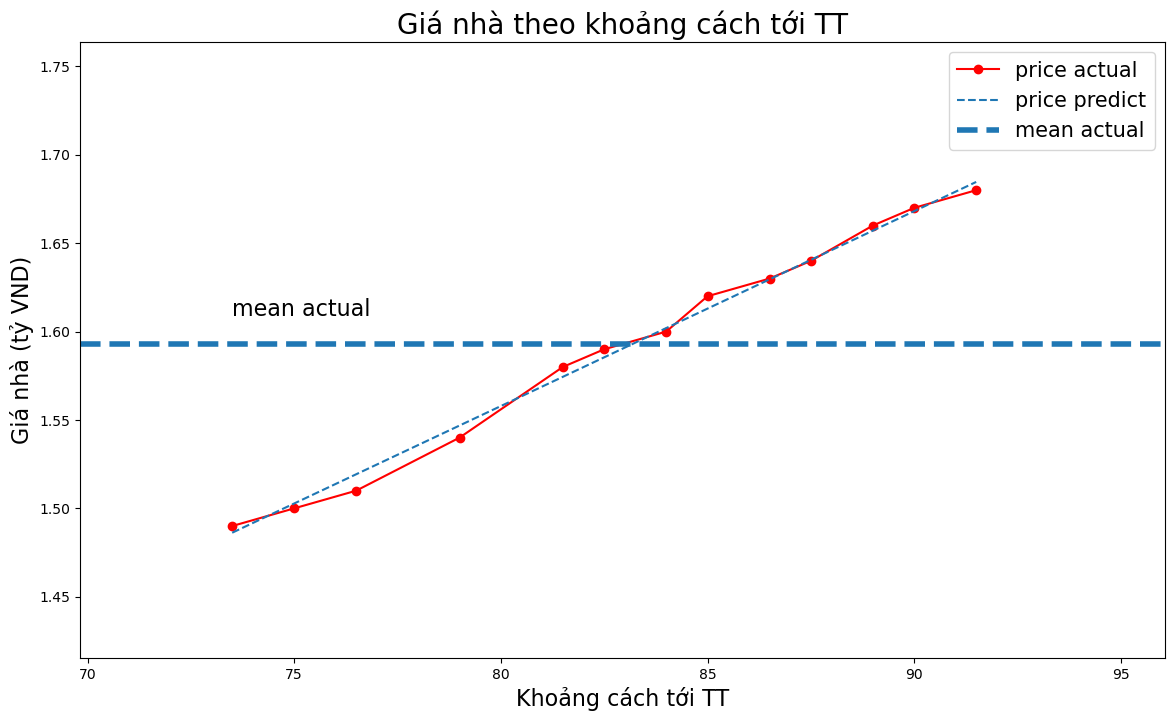

array([ 0.01102528, -0.        ])

In [224]:
from sklearn.linear_model import Lasso

las_regr = Lasso(alpha = 0.005)
las_regr.fit(X, y)

y_pred_las = las_regr.predict(X)

_plot_act_pred(x1, y, y_pred_las, 
      title='Giá nhà theo khoảng cách tới TT',  
      xlabel='Khoảng cách tới TT', 
      ylabel='Giá nhà (tỷ VND)')
las_regr.coef_

In [268]:
rid_regr.get_params()

{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [270]:
las_regr.get_params()

{'alpha': 0.005,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}